In [21]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [3]:
folder_path = "/mnt/disk1/ducntm/BenchmarkTTA/save_imgs/pacs/art_painting/cartoon/1"

In [4]:
full_files = os.listdir(folder_path)

In [6]:
file_path = os.path.join(folder_path, full_files[0])

In [7]:
df = pd.read_csv(file_path)

In [8]:
df

,predictions,labels,entropys,plpds
0,0,1,1.232874,0.340253
1,4,4,0.264199,0.520777
2,5,5,0.196293,0.076404
3,4,4,0.204008,0.313287
4,5,5,1.182387,0.076843
...,...,...,...,...
59,5,5,0.354789,0.128614
60,2,2,0.187241,0.602165
61,2,2,0.605542,0.052336
62,0,0,1.092198,0.546315


In [12]:
df["correct"] = df["predictions"] == df["labels"]

In [13]:
df

,predictions,labels,entropys,plpds,correct
0,0,1,1.232874,0.340253,False
1,4,4,0.264199,0.520777,True
2,5,5,0.196293,0.076404,True
3,4,4,0.204008,0.313287,True
4,5,5,1.182387,0.076843,True
...,...,...,...,...,...
59,5,5,0.354789,0.128614,True
60,2,2,0.187241,0.602165,True
61,2,2,0.605542,0.052336,True
62,0,0,1.092198,0.546315,True


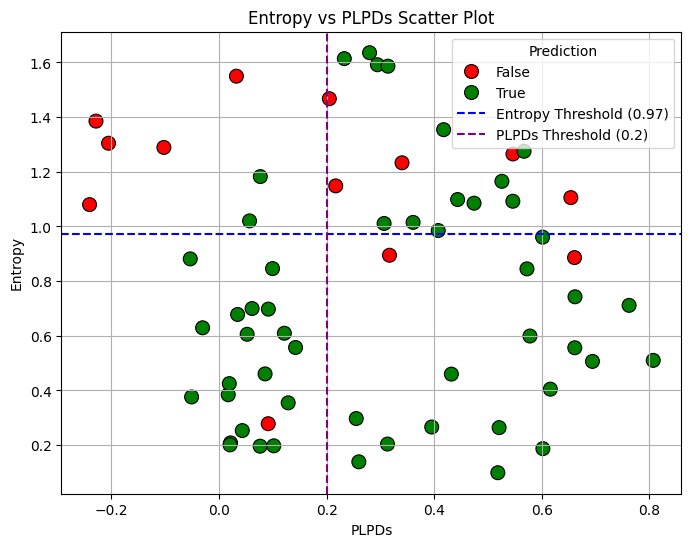

correct                   False  True 
region                                
Low Entropy, Low PLPDs        1     19
Low Entropy, High PLPDs       2     17
High Entropy, Low PLPDs       5      2
High Entropy, High PLPDs      5     13


In [26]:
# Define threshold values
entropy_threshold = 0.5 * math.log(7)
plpds_threshold = 0.2

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    y=df["entropys"],
    x=df["plpds"],
    hue=df["correct"],  # Color by correctness
    palette={True: "green", False: "red"},
    edgecolor="black",
    s=100,  # Adjust size for visibility
)
plt.axhline(y=entropy_threshold, color="blue", linestyle="--", label=f"Entropy Threshold ({entropy_threshold:.2f})")
plt.axvline(x=plpds_threshold, color="purple", linestyle="--", label=f"PLPDs Threshold ({plpds_threshold})")

# Labels and title
plt.ylabel("Entropy")
plt.xlabel("PLPDs")
plt.title("Entropy vs PLPDs Scatter Plot")
plt.legend(title="Prediction")
plt.grid(True)

# Show plot
plt.show()

df["region"] = (
    (df["entropys"] > entropy_threshold).astype(int) * 2 +  # High entropy → 2 or 3
    (df["plpds"] > plpds_threshold).astype(int)             # High PLPDs → 1 or 3
)

# Count true (correct) and wrong (incorrect) samples in each region
region_counts = df.groupby(["region", "correct"]).size().unstack(fill_value=0)

# Rename region indices for clarity
region_mapping = {
    0: "Low Entropy, Low PLPDs",
    1: "Low Entropy, High PLPDs",
    2: "High Entropy, Low PLPDs",
    3: "High Entropy, High PLPDs"
}
region_counts.index = region_counts.index.map(region_mapping)

# Print results
print(region_counts)

In [ ]:
for i, file in enumerate(full_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df["correct"] = df["predictions"] == df["labels"]
    # entropy_threshold = 0.5 * math.log(7)
    # plpds_threshold = 0.2

    # Define threshold values
    entropy_threshold = 0.5 * math.log(7)
    plpds_threshold = 0.2

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        y=df["entropys"],
        x=df["plpds"],
        hue=df["correct"],  # Color by correctness
        palette={True: "green", False: "red"},
        edgecolor="black",
        s=100,  # Adjust size for visibility
    )
    df["region"] = (
        (df["entropys"] > entropy_threshold).astype(int) * 2 +  # High entropy → 2 or 3
        (df["plpds"] > plpds_threshold).astype(int)             # High PLPDs → 1 or 3
    )

    # Count true (correct) and wrong (incorrect) samples in each region
    region_counts = df.groupby(["region", "correct"]).size().unstack(fill_value=0)

    # Rename region indices for clarity
    region_mapping = {
        0: "Low Entropy, Low PLPDs",
        1: "Low Entropy, High PLPDs",
        2: "High Entropy, Low PLPDs",
        3: "High Entropy, High PLPDs"
    }
    region_counts.index = region_counts.index.map(region_mapping)

    # Print results
    # print(region_counts)
    plt.axhline(y=entropy_threshold, color="blue", linestyle="--", label=f"Entropy Threshold ({entropy_threshold:.2f})")
    plt.axvline(x=plpds_threshold, color="purple", linestyle="--", label=f"PLPDs Threshold ({plpds_threshold})")

    # Labels and title
    plt.ylabel("Entropy")
    plt.xlabel("PLPDs")
    plt.title("Entropy vs PLPDs Scatter Plot")
    plt.legend(title="Prediction")
    plt.grid(True)

    # Show plot
    plt.show()

In [32]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define threshold values
entropy_threshold = 0.5 * math.log(7)
plpds_threshold = 0.2

# Initialize total region count
total_region_counts = pd.DataFrame()

# Define folder paths and output locations
folder_path = "/mnt/disk1/ducntm/BenchmarkTTA/save_imgs/pacs/photo/art_painting/1"
output_csv = "region_counts.csv"
output_plots_dir = f"plots"
import shutil
# Ensure the output directory exists
if os.path.exists(output_plots_dir):
    shutil.rmtree(output_plots_dir)
os.makedirs(output_plots_dir, exist_ok=True)

# Process all files
for i, file in enumerate(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, file)
    
    # Read data
    df = pd.read_csv(file_path)
    df["correct"] = df["predictions"] == df["labels"]

    # Assign regions based on thresholds
    df["region"] = (
        (df["entropys"] > entropy_threshold).astype(int) * 2 +  # High entropy → 2 or 3
        (df["plpds"] > plpds_threshold).astype(int)             # High PLPDs → 1 or 3
    )

    # Compute region counts for this file
    region_counts = df.groupby(["region", "correct"]).size().unstack(fill_value=0)

    # Append to total count
    total_region_counts = total_region_counts.add(region_counts, fill_value=0)

    # Plot and save scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        y=df["entropys"],
        x=df["plpds"],
        hue=df["correct"],  # Color by correctness
        palette={True: "green", False: "red"},
        edgecolor="black",
        s=100,  # Adjust size for visibility
    )

    # Draw threshold lines
    plt.axhline(y=entropy_threshold, color="blue", linestyle="--", label=f"Entropy Threshold ({entropy_threshold:.2f})")
    plt.axvline(x=plpds_threshold, color="purple", linestyle="--", label=f"PLPDs Threshold ({plpds_threshold:.2f})")

    # Labels and title
    plt.ylabel("Entropy")
    plt.xlabel("PLPDs")
    plt.title(f"Entropy vs PLPDs Scatter Plot - {file}")
    plt.legend(title="Prediction")
    plt.grid(True)

    # Save plot instead of showing
    plot_filename = os.path.join(output_plots_dir, f"{file}.png")
    plt.savefig(plot_filename)
    plt.close()

# Rename region indices for clarity
region_mapping = {
    0: "Low Entropy, Low PLPDs",
    1: "Low Entropy, High PLPDs",
    2: "High Entropy, Low PLPDs",
    3: "High Entropy, High PLPDs"
}
total_region_counts.index = total_region_counts.index.map(region_mapping)

# Save the final aggregated region count to CSV
total_region_counts.to_csv(output_csv)

print(f"Final region counts saved to {output_csv}")


Final region counts saved to region_counts.csv


In [33]:
df = pd.read_csv("/mnt/disk1/ducntm/BenchmarkTTA/save_propose/officehome/Art/1/2/0.8/0.csv")

In [34]:
df

,predictions,labels,entropys,plpd_news,plpds
0,53,61,0.354431,-0.018746,2.638977
1,16,16,-0.025135,0.012447,3.695359
2,35,35,0.099774,0.002612,3.597533
3,64,64,-0.286290,0.006618,3.257793
4,4,4,0.525602,0.001741,0.522930
...,...,...,...,...,...
59,37,37,0.606672,-0.002342,0.596610
60,52,52,0.088723,-0.008208,0.927257
61,62,53,0.000584,-0.004223,3.699111
62,0,0,0.039135,-0.001818,0.279060


In [38]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Define threshold values
entropy_threshold = 0.5 * math.log(65)
plpds_threshold = 0.2
proposal_cri_threshold = 0.0008  # New threshold added

# Initialize total region count
total_region_counts = pd.DataFrame()

# Define folder paths and output locations
folder_path = "/mnt/disk1/ducntm/BenchmarkTTA/save_propose/officehome/Art/Product/1/2/0.8"
output_csv = "region_counts.csv"
output_plots_dir = "plots"

# Ensure the output directory exists
if os.path.exists(output_plots_dir):
    shutil.rmtree(output_plots_dir)
os.makedirs(output_plots_dir, exist_ok=True)

# Define region names explicitly
region_mapping = {
    0: "Low Entropy, Low PLPDs, Low Proposal_CRI",
    1: "Low Entropy, Low PLPDs, High Proposal_CRI",
    2: "Low Entropy, High PLPDs, Low Proposal_CRI",
    3: "Low Entropy, High PLPDs, High Proposal_CRI",
    4: "High Entropy, Low PLPDs, Low Proposal_CRI",
    5: "High Entropy, Low PLPDs, High Proposal_CRI",
    6: "High Entropy, High PLPDs, Low Proposal_CRI",
    7: "High Entropy, High PLPDs, High Proposal_CRI",
}

# Process all files
for i, file in enumerate(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, file)
    
    # Read data
    df = pd.read_csv(file_path)
    df.rename(columns={"plpd_news": "proposal_cri"}, inplace=True)
    df["correct"] = df["predictions"] == df["labels"]

    # Assign regions based on thresholds
    df["region"] = (
        (df["entropys"] > entropy_threshold).astype(int) * 4 +  # High entropy → 4-7
        (df["plpds"] > plpds_threshold).astype(int) * 2 +       # High PLPDs → 2,3,6,7
        (df["proposal_cri"] > proposal_cri_threshold).astype(int)  # High Proposal_CRI → 1,3,5,7
    )

    # Compute region counts for this file
    region_counts = df.groupby(["region", "correct"]).size().unstack(fill_value=0)

    # Ensure all 8 regions are explicitly present (fill missing with 0)
    region_counts = region_counts.reindex(region_mapping.keys(), fill_value=0)

    # Rename index for clarity
    region_counts.index = region_counts.index.map(region_mapping)

    # Append to total count
    total_region_counts = total_region_counts.add(region_counts, fill_value=0)

    # Plot and save scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        y=df["entropys"],
        x=df["plpds"],
        hue=df["correct"],  # Color by correctness
        palette={True: "green", False: "red"},
        edgecolor="black",
        s=100,  # Adjust size for visibility
    )

    # Draw threshold lines
    plt.axhline(y=entropy_threshold, color="blue", linestyle="--", label=f"Entropy Threshold ({entropy_threshold:.2f})")
    plt.axvline(x=plpds_threshold, color="purple", linestyle="--", label=f"PLPDs Threshold ({plpds_threshold:.2f})")

    # Labels and title
    plt.ylabel("Entropy")
    plt.xlabel("PLPDs")
    plt.title(f"Entropy vs PLPDs Scatter Plot - {file}")
    plt.legend(title="Prediction")
    plt.grid(True)

    # Save plot instead of showing
    plot_filename = os.path.join(output_plots_dir, f"{file}.png")
    plt.savefig(plot_filename)
    plt.close()

# Ensure all 8 regions appear in final output
total_region_counts = total_region_counts.reindex(region_mapping.values(), fill_value=0)

# Save the final aggregated region count to CSV
total_region_counts.to_csv(output_csv)

print(f"Final region counts saved to {output_csv}")


Final region counts saved to region_counts.csv


In [39]:
print(df["region"])

0     2
1     2
2     2
3     2
4     2
     ..
59    2
60    3
61    3
62    3
63    0
Name: region, Length: 64, dtype: int64


In [40]:
total_region_counts

correct,False,True
region,,
"Low Entropy, Low PLPDs, Low Proposal_CRI",6.0,138.0
"Low Entropy, Low PLPDs, High Proposal_CRI",0.0,38.0
"Low Entropy, High PLPDs, Low Proposal_CRI",835.0,1433.0
"Low Entropy, High PLPDs, High Proposal_CRI",781.0,1185.0
"High Entropy, Low PLPDs, Low Proposal_CRI",0.0,0.0
"High Entropy, Low PLPDs, High Proposal_CRI",0.0,0.0
"High Entropy, High PLPDs, Low Proposal_CRI",0.0,0.0
"High Entropy, High PLPDs, High Proposal_CRI",0.0,0.0


In [7]:
import os
import pandas as pd 
import numpy as np
import cv2
import math

In [3]:
folder = "/mnt/disk1/ducntm/BenchmarkTTA/save_deyo/imagenet_c/origin/brightness/3"

In [4]:
full_files = os.listdir(folder)

In [11]:
ent = 0.5
plpds_threshold = 0.2

In [13]:
total_region_counts = pd.DataFrame()
for file in full_files:
    path = os.path.join(folder, file)
    entropy_threshold = ent * math.log(1000)

    df = pd.read_csv(path)
    df["correct"] = df["predictions"] == df["labels"]
    df["region"] = (
        (df["entropys"] > entropy_threshold).astype(int) * 2 +  # High entropy → 2 or 3
        (df["plpds"] > plpds_threshold).astype(int)             # High PLPDs → 1 or 3
    )
    region_counts = df.groupby(["region", "correct"]).size().unstack(fill_value=0)
    total_region_counts = total_region_counts.add(region_counts, fill_value=0)
    # Rename region indices for clarity
    region_mapping = {
        0: "Low Entropy, Low PLPDs",
        1: "Low Entropy, High PLPDs",
        2: "High Entropy, Low PLPDs",
        3: "High Entropy, High PLPDs"
    }
    region_counts.index = region_counts.index.map(region_mapping)
    total_region_counts.to_csv("save.csv")